In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [69]:
df = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(df['Electric Range'].dropna(),bins = 50)
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()

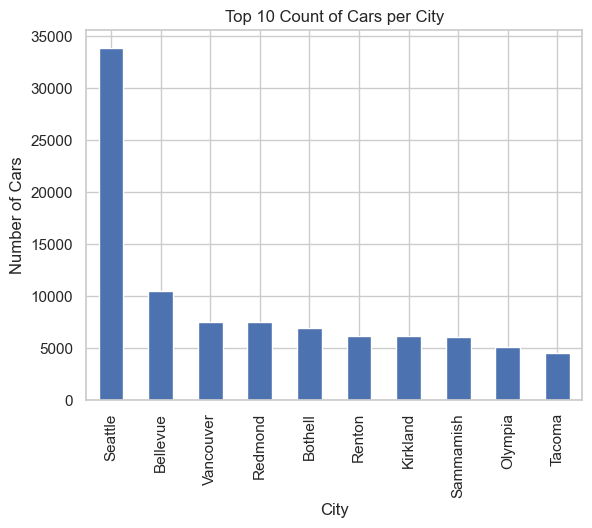

,count
City,
Seattle,33854
Bellevue,10414
Vancouver,7475
Redmond,7438
Bothell,6877
Renton,6132
Kirkland,6093
Sammamish,5995
Olympia,5079


In [72]:
#print(df['Base MSRP'].describe())
df = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')
car_counts_Cty = df['City'].value_counts().nlargest(10)


car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()


car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')


<Axes: ylabel='count'>

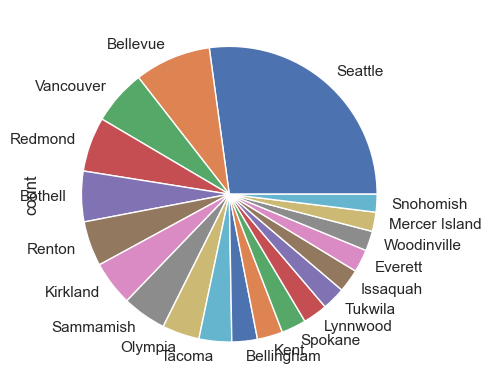

In [86]:
City_df = pd.DataFrame(df.City[:20].value_counts().sort_index())
cities_by_Electric_Range=df.City.value_counts()
cities_by_Electric_Range[:20].plot(kind='pie')

<Axes: xlabel='Electric Range', ylabel='Base MSRP'>

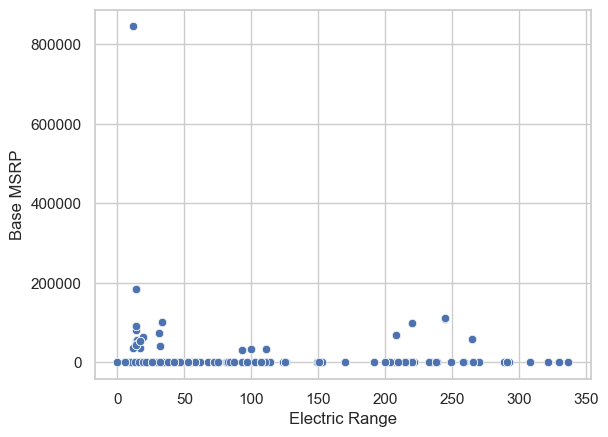

In [73]:
sns.scatterplot(data=df, x="Electric Range", y="Base MSRP")

<Axes: xlabel='Electric Range', ylabel='Model Year'>

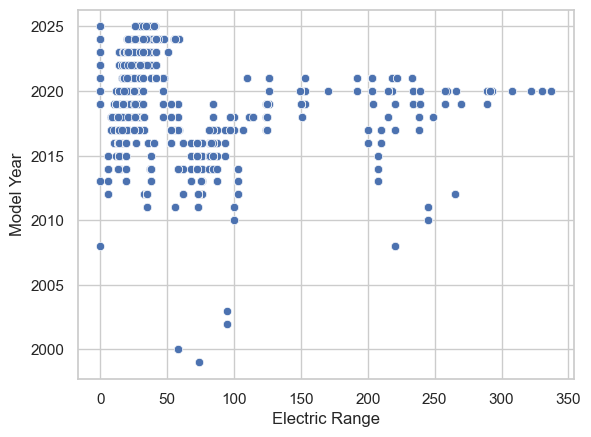

In [74]:
sns.scatterplot(data = df, x = 'Electric Range', y = 'Model Year')

C:\Users\ahmad\AppData\Local\Temp\ipykernel_6992\311254092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Count', palette='viridis')


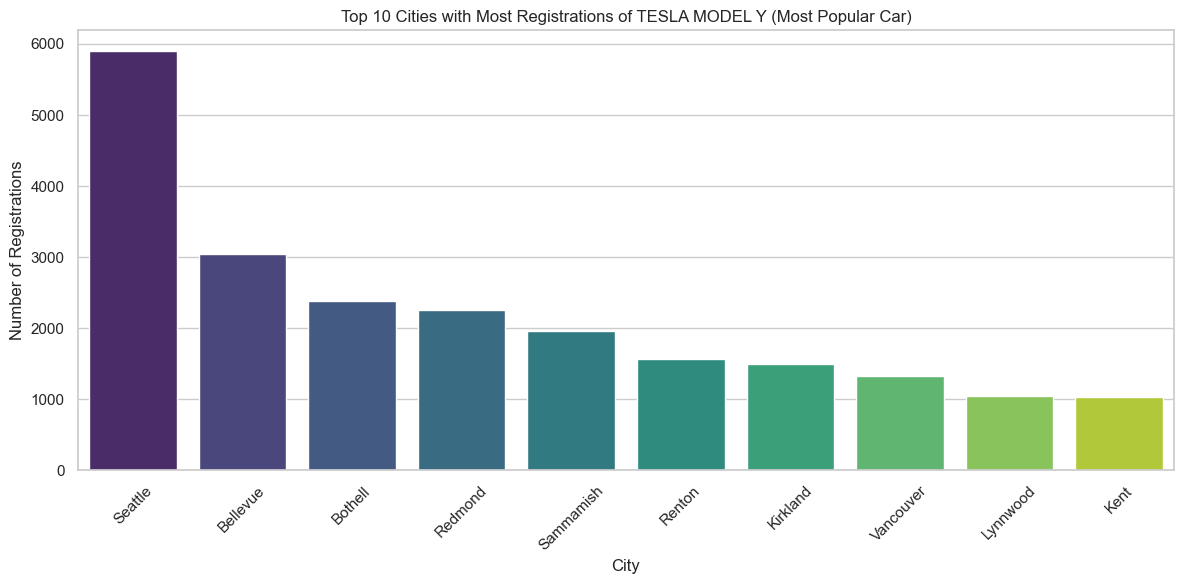

The most popular car model is TESLA MODEL Y.


In [75]:
car_counts = df.groupby(['Make', 'Model']).size().reset_index(name='Count')
most_popular_car = car_counts.loc[car_counts['Count'].idxmax()]
popular_car_make = most_popular_car['Make']
popular_car_model = most_popular_car['Model']
popular_car_registrations = df[(df['Make'] == popular_car_make) & (df['Model'] == popular_car_model)]
city_counts = popular_car_registrations['City'].value_counts().reset_index(name='Count')
city_counts.columns = ['City', 'Count']
top_cities = city_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='Count', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Registrations')
plt.title(f'Top 10 Cities with Most Registrations of {popular_car_make} {popular_car_model} (Most Popular Car)')
plt.tight_layout()
plt.show()

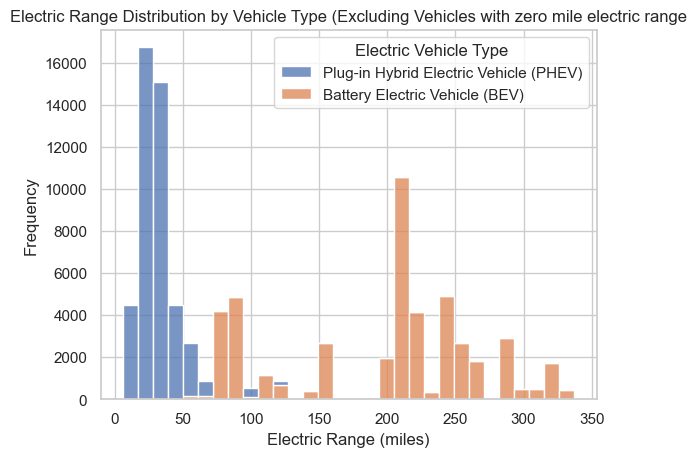

In [77]:
non_zero_range = df[df['Electric Range'] > 0]

sns.histplot(data=non_zero_range, x='Electric Range', hue='Electric Vehicle Type', bins=30, multiple='stack')
plt.title("Electric Range Distribution by Vehicle Type (Excluding Vehicles with zero mile electric range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()



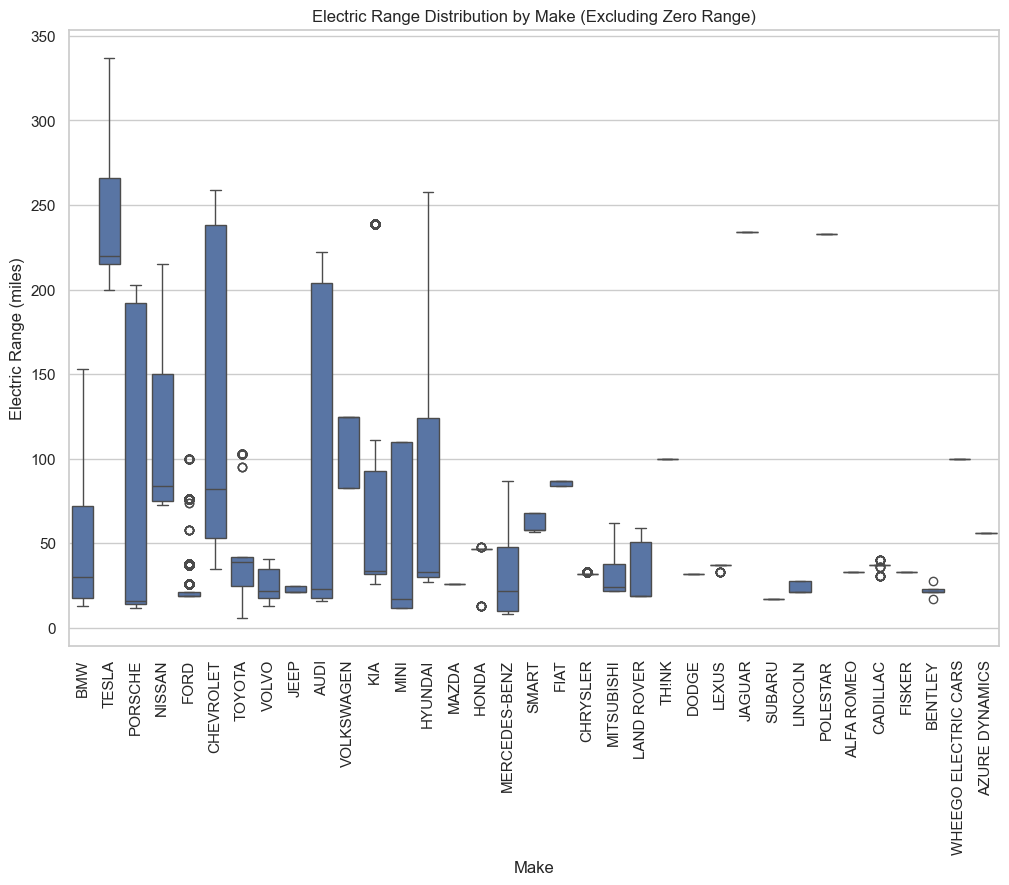

In [78]:
df_filtered = df[df['Electric Range'] > 0]

plt.figure(figsize=(12, 8))  

sns.boxplot(data=df_filtered, x='Make', y='Electric Range')
plt.title("Electric Range Distribution by Make (Excluding Zero Range)")
plt.xlabel("Make")
plt.ylabel("Electric Range (miles)")
plt.xticks(rotation=90) 
plt.show()

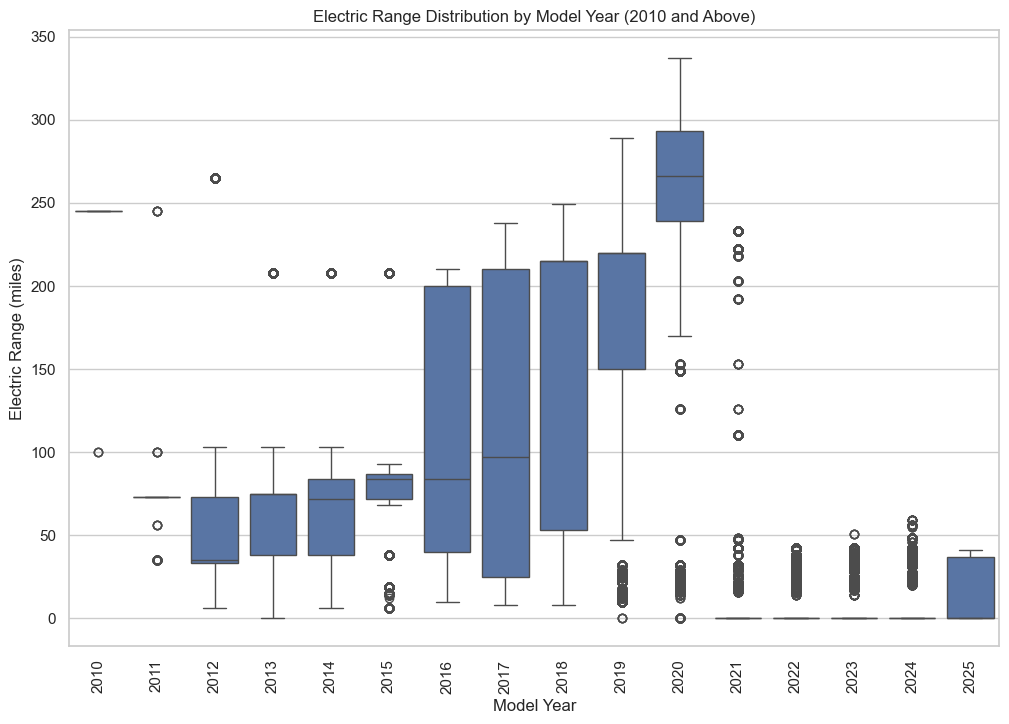

In [79]:
df_filtered = df[df['Model Year'] >= 2010]


plt.figure(figsize=(12, 8)) 

# Plot the boxplot for Electric Range by Model Year
sns.boxplot(data=df_filtered, x='Model Year', y='Electric Range')
plt.title("Electric Range Distribution by Model Year (2010 and Above)")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.xticks(rotation=90)  
plt.show()


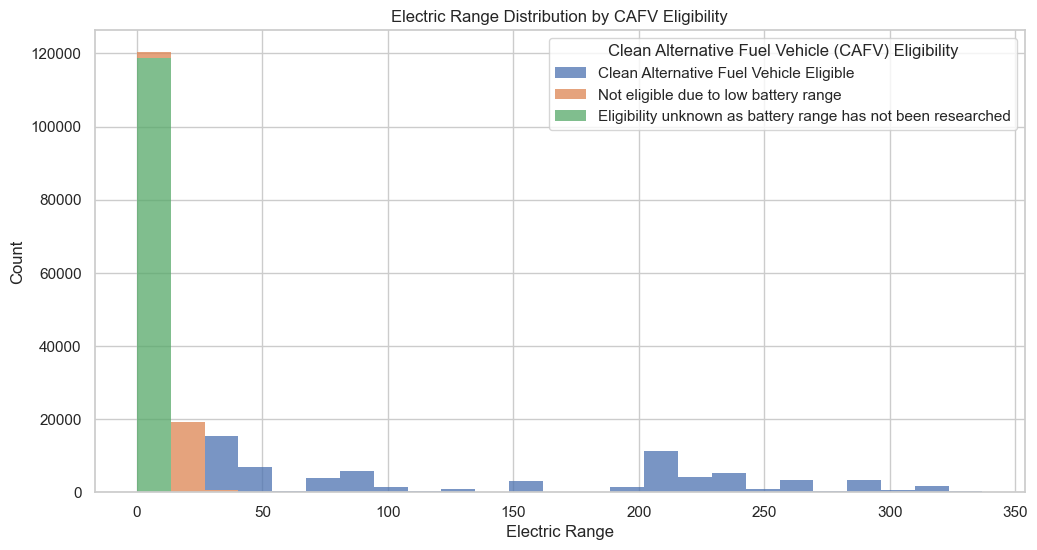

In [80]:
plt.figure(figsize=(12, 6))  

sns.histplot(data=df, 
             x="Electric Range", 
             hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", 
             multiple="stack", 
             linewidth=0,bins = 25) 


plt.title('Electric Range Distribution by CAFV Eligibility')
plt.xlabel('Electric Range')
plt.ylabel('Count')


plt.show()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_6992\3299205545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts.head(20), x='City', y='Count', palette='viridis')  # Display top 20 cities


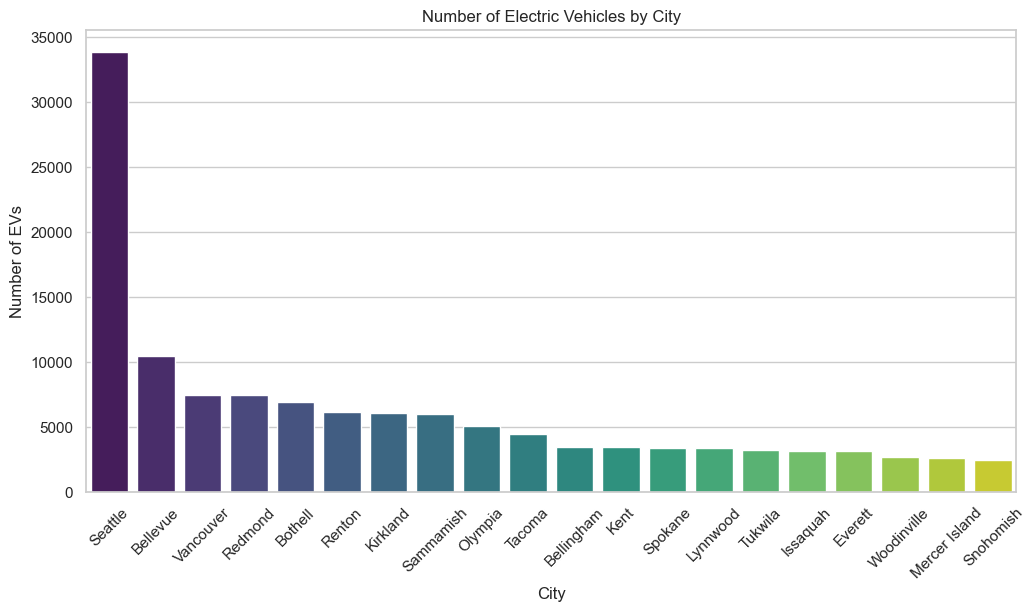

In [81]:
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=city_counts.head(20), x='City', y='Count', palette='viridis')  # Display top 20 cities
plt.title('Number of Electric Vehicles by City')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_6992\4162359898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_counts.head(20), x='County', y='Count', palette='magma')  # Display top 20 counties


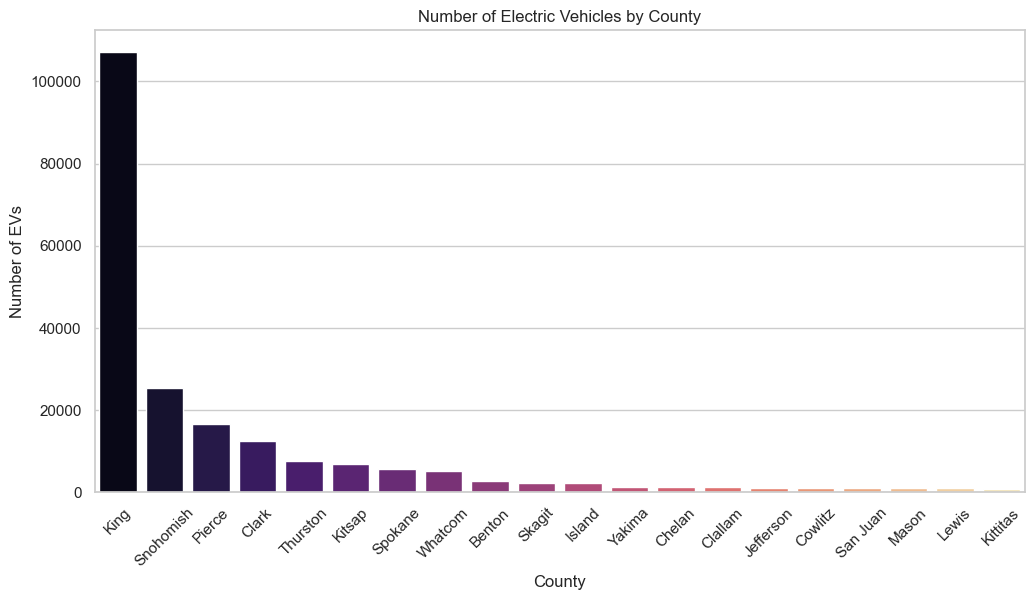

In [82]:
county_counts = df['County'].value_counts().reset_index()
county_counts.columns = ['County', 'Count']


plt.figure(figsize=(12, 6))
sns.barplot(data=county_counts.head(20), x='County', y='Count', palette='magma')  # Display top 20 counties
plt.title('Number of Electric Vehicles by County')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()


In [ ]:
state_abbr_to_name = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware",
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
    "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York",
    "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah",
    "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming", "DC": "District of Columbia"
}

In [68]:
df = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')# Count vehicles by state abbreviation
vehicle_counts = df['State'].value_counts().reset_index()
vehicle_counts.columns = ['State', 'Vehicle Count']
vehicle_counts['State'] = vehicle_counts['State'].map(state_abbr_to_name)
vehicle_counts.dropna(subset=['State'], inplace=True)

print(vehicle_counts)

                   State  Vehicle Count
0             Washington         209720
1             California            113
2               Virginia             60
3               Maryland             37
4                  Texas             28
5         North Carolina             19
6               Colorado             17
7                Florida             12
8                Georgia             10
9               Illinois             10
10               Alabama              9
11               Arizona              9
12           Connecticut              8
13              Missouri              7
14              New York              7
15                Nevada              7
16            New Jersey              7
17                Hawaii              6
18        South Carolina              6
19                Oregon              6
20              Michigan              6
21              Kentucky              5
22                 Idaho              5
23         Massachusetts              4


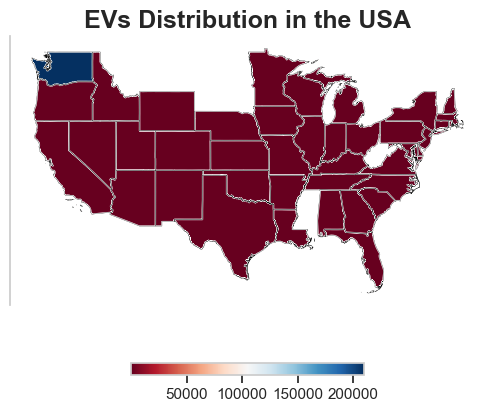

In [84]:
shape_path = r"C:\Users\ahmad\Downloads\cb_2018_us_state_500k\cb_2018_us_state_500k.shp"
shape = gpd.read_file(shape_path)
shape = pd.merge(
    left = shape,
    right = vehicle_counts,
    left_on = 'NAME',
    right_on='State',
    how = 'left'
)

shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])]

ax = shape.boundary.plot(edgecolor = 'black',linewidth = 0.2, figsize = (10,5))
shape.plot(ax = ax,column='Vehicle Count',legend = True,cmap = 'RdBu',legend_kwds = ({'shrink':0.3,'orientation': 'horizontal'}))

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right','bottom','top']:
    ax.spines[edge].set_visible(False)

ax.set_title("EVs Distribution in the USA",size=18,weight='bold')
plt.show()